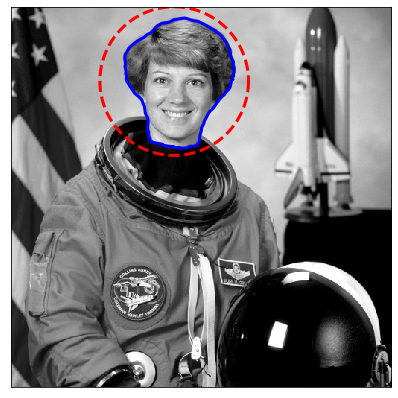

In [7]:
import numpy as np
import matplotlib.pyplot as plt
from skimage.color import rgb2gray
from skimage import data
from skimage.filters import gaussian
from skimage.segmentation import active_contour


img = data.astronaut()
img = rgb2gray(img)

s = np.linspace(0, 2 * np.pi, 400)
r = 100 + 100 * np.sin(s)
c = 220 + 100 * np.cos(s)
init = np.array([r, c]).T

snake = active_contour(gaussian(img, 2),
                       init, alpha=0.015, beta=10, gamma=0.001,
                       coordinates='rc')

fig, ax = plt.subplots(figsize=(7, 7))
ax.imshow(img, cmap=plt.cm.gray)
ax.plot(init[:, 1], init[:, 0], '--r', lw=3)
ax.plot(snake[:, 1], snake[:, 0], '-b', lw=3)
ax.set_xticks([]), ax.set_yticks([])
ax.axis([0, img.shape[1], img.shape[0], 0])

plt.show()

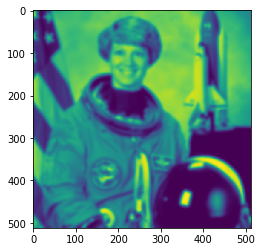

In [8]:
plt.imshow(gaussian(img, 3))

In [4]:
import torch
from torch import nn


class SobelFilter(nn.Module):
    def __init__(self):
        super(SobelFilter, self).__init__()
        
        self.g_x = nn.Conv2d(1, 1, (3, 3), bias=False)
        self.g_y = nn.Conv2d(1, 1, (3, 3), bias=False)
        
        self.g_x.weight.data = torch.from_numpy(np.array([[[[-1., -2., -1,],
                                                          [0., 0., 0.],
                                                          [1., 2., 1.]]]], dtype=np.float32))
        self.g_x.requires_grad_(False)
        
        self.g_y.weight.data = torch.from_numpy(np.array([[[[-1., 0., 1.],
                                                          [-2., 0., 2.],
                                                          [-1., 0., 1.]]]], dtype=np.float32))
        self.g_y.requires_grad_(False)
        
    def forward(self, x):
        return torch.sqrt(torch.pow(self.g_x(x), 2) + torch.pow(self.g_y(x), 2))

In [5]:
sobel = SobelFilter()

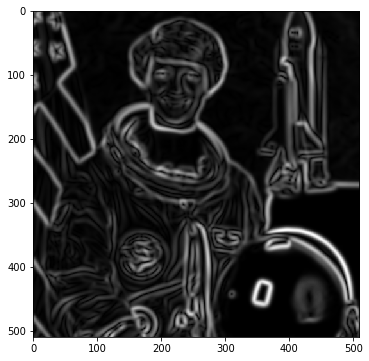

In [6]:
img_batch = torch.from_numpy(gaussian(img, 3)[np.newaxis, np.newaxis, :, :].astype(np.float32))
plt.figure(figsize=(6, 6))
plt.imshow(sobel(img_batch).detach().cpu().numpy()[0][0], cmap='gray')

In [ ]:
def active_contour(image, snake, alpha=0.01, beta=0.1,
                   w_line=0, w_edge=1, gamma=0.01,
                   bc=None, max_px_move=1.0,
                   max_iterations=2500, convergence=0.1,
                   *,
                   boundary_condition='periodic',
                   coordinates=None):
    
    sobel = SobelFilter()
    edge = sobel(image)
    image = w_line*image + w_edge*edge[0]

In [ ]:
img = data.text()

r = np.linspace(136, 50, 100)
c = np.linspace(5, 424, 100)
init = np.array([r, c]).T

snake = active_contour(gaussian(img, 1), init, boundary_condition='fixed',
                       alpha=0.1, beta=1.0, w_line=-5, w_edge=0, gamma=0.1,
                       coordinates='rc')

fig, ax = plt.subplots(figsize=(9, 5))
ax.imshow(img, cmap=plt.cm.gray)
ax.plot(init[:, 1], init[:, 0], '--r', lw=3)
ax.plot(snake[:, 1], snake[:, 0], '-b', lw=3)
ax.set_xticks([]), ax.set_yticks([])
ax.axis([0, img.shape[1], img.shape[0], 0])

plt.show()

In [ ]:
gaussian(img, 1).shape

In [10]:
from contrib.handcrafted_data import syn_dataset
from utils import (
    SyntheticPatch, LinePerturbationPipe, LineRandomShift, LineClip,
    wrap_lines_into_numpy_batch
)

from operator import itemgetter

In [11]:
from vectran.data.graphics_primitives import PrimitiveType

np.random.seed(50)

sample = syn_dataset[0]
raster, vectors = itemgetter('raster', 'vector')(sample)
vectors = sample['vector'][PrimitiveType.PT_LINE]
vectors = vectors[vectors.sum(axis=1) != 0][:, :5]

In [12]:
vectors

array([[ 0.        , 18.60501411, 18.94798901, 20.26274834,  5.56322013],
       [ 0.        , 47.32328108, 33.13611815, -0.        ,  1.87280114]])

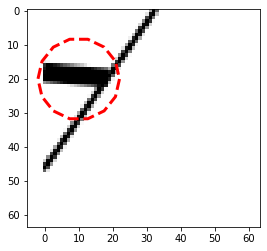

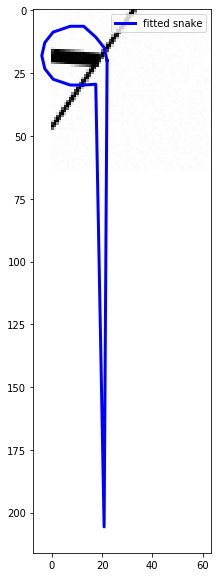

In [15]:
img = 1. - np.array(SyntheticPatch.from_lines(vectors).get_image())
plt.imshow(img, cmap='gray')

# contour = np.array([[0., 24.], [0., 18.], [0., 12.], [10., 13.5], [20., 15.], [18.5, 19.], [17., 23.], [8.5, 23.5], [0., 24.]]) + np.array([5., 5.])
# contour = np.array([[0., 24.], [0., 12.], [20., 15.], [17., 23.], [0., 24.]])  # + np.array([5., 5.])
# contour = np.array([[0, 19], [0, 16], [18, 17], [16, 20], [0, 19]])

# contour[:, 0], contour[:, 1] = contour[:, 1].copy(), contour[:, 0].copy()

s = np.linspace(0, 2 * np.pi, 15)
r = 20 + 12 * np.sin(s)
c = 10 + 12 * np.cos(s)

# # r = np.linspace(10, 15, 5)
# # c = np.linspace(0, 20, 5)

init = np.array([r, c]).T
plt.plot(init[:, 1], init[:, 0], '--r', lw=3)

img = gaussian(img, 0.)
img = img + 5 * np.random.random(img.shape)
img /= img.max()

ready_snake = active_contour(img, init, coordinates='rc', w_line=-1., w_edge=-10., alpha=0.01, beta=0.1, 
                             boundary_condition='periodic', max_iterations=1000, convergence=0.01, gamma=0.01)

# ready_snake = active_contour(gaussian(img, 3), ready_snake, coordinates='rc', w_line=-2.5, w_edge=-1., alpha=0.0001, 
#                              boundary_condition='free', max_iterations=500, convergence=0.1, gamma=0.01)

# ready_snake = active_contour(gaussian(img, 2), ready_snake, coordinates='rc', w_line=-2.5, w_edge=-1., alpha=0.0001, 
#                              boundary_condition='free', max_iterations=500, convergence=0.1, gamma=0.01)

# ready_snake = active_contour(gaussian(img, 1), ready_snake, coordinates='rc', w_line=-2.5, w_edge=-1., alpha=0.0001, 
#                              boundary_condition='free', max_iterations=500, convergence=0.1, gamma=0.01)

plt.figure(figsize=(10, 10))
plt.imshow(img, cmap='gray')
# plt.plot(contour[:, 1], contour[:, 0], label='initial contour')
plt.plot(ready_snake[:, 1], ready_snake[:, 0], '-b', lw=3, label='fitted snake')
plt.legend()
plt.show()

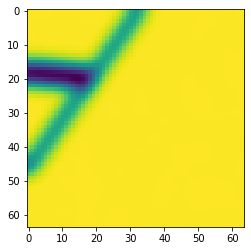

In [8]:
plt.imshow(gaussian(img, 2))